In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df_smoke=pd.read_csv('/workspaces/codespaces-blank/Proyecto_DS/datasets/raw/smoke_detection_iot.csv')

df_smoke = df_smoke.drop('Unnamed: 0', axis='columns')
#df_smoke.index = df_smoke['CNT']
df_smoke = df_smoke.drop('CNT', axis='columns')

from datetime import datetime

df_smoke['UTC'] = pd.to_datetime(df_smoke['UTC'], unit='s')
df_smoke.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,2022-06-09 00:08:51,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,2022-06-09 00:08:52,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,2022-06-09 00:08:53,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,2022-06-09 00:08:54,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,2022-06-09 00:08:55,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [3]:
X = df_smoke.drop("Fire Alarm", axis=1) 
y = df_smoke['Fire Alarm']               # target feature
df_smoke.head()
X


,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,2022-06-09 00:08:51,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000
1,2022-06-09 00:08:52,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000
2,2022-06-09 00:08:53,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000
3,2022-06-09 00:08:54,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000
4,2022-06-09 00:08:55,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,2022-06-13 14:20:47,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015
62626,2022-06-13 14:20:48,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015
62627,2022-06-13 14:20:49,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014
62628,2022-06-13 14:20:50,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014


In [4]:
y

0        0
1        0
2        0
3        0
4        0
        ..
62625    0
62626    0
62627    0
62628    0
62629    0
Name: Fire Alarm, Length: 62630, dtype: int64

In [5]:
#calculamos primer y tercer cuartil
from scipy import stats
q1 = X.quantile(0.25)
q3 = X.quantile(0.75)
#calculamos el rango intercuartílico iqr
iqr = q3 - q1
#hacemos copia de x para no reescribir los datos. 
X_r= X.copy()
#crea columna de outliers, si vale 1 es valor atipico, si no 0 (usando método iqr). Se considera valor atipico
#todo aquel mas alla del 1.5 del iqr.
#si lo uso asi derecho tengo un problema de etiquetas, sospecho que es porque la columna UTC tiene formato
#fecha.
#X_r['outlier_iqr'] = X_r.apply(lambda row: 1 if any(np.abs(row - q3) > 1.5*iqr) else 0, axis=1)

#intento solucionar lo anterior seleccionando solo aquellas columnas con datos del tipo float o int, como 
#devuelve un index tengo que modificar ahora el codigo anterior
#num_cols = X_r.select_dtypes(include=['float', 'int']).columns
#X_r.loc[:, num_cols]['outlier_iqr'] = X_r[num_cols].apply(lambda row: 1 if any(np.abs(row - q3) > 1.5*iqr) else 0, axis=1)
#hasta aca funciona pero no me agrega la columna 'outlier_iqr' asi que voy a intentar dropeando utc
X_r=X_r.drop('UTC',axis='columns')
X_r

/tmp/ipykernel_1126/4111028205.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = X.quantile(0.25)
/tmp/ipykernel_1126/4111028205.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = X.quantile(0.75)


,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014


In [6]:
X_r['outlier_iqr'] = X_r.apply(lambda row: 1 if any(np.abs(row - q3) > 1.5*iqr) else 0, axis=1)

In [1]:
X_r['outlier_iqr'].value_counts()

NameError: name 'X_r' is not defined

In [8]:
med = X.median()
X_r['outlier_tukey']=X_r.drop(columns='outlier_iqr').apply(lambda row: 1 if any(np.abs(row - med) > 1.5*iqr) else 0, axis=1)

/tmp/ipykernel_1126/4017861868.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  med = X.median()


In [9]:
X_r['outlier_tukey'].value_counts()

1    38873
0    23757
Name: outlier_tukey, dtype: int64

In [10]:
X_r

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,outlier_iqr,outlier_tukey
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,1,1
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,1
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,1,1
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,1,1
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,1,1
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,1,1
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,1,1
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,1,1


In [11]:
#eliminamos los datos que corresponden a outliers identificados por AMBOS métodos
X_r[~((X_r['outlier_iqr']==1) & (X_r['outlier_tukey']==1))]

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,outlier_iqr,outlier_tukey
1402,26.389,55.31,30,400,13093,19974,939.679,0.75,0.77,5.13,0.800,0.018,1,0
1403,26.385,55.39,20,400,13101,19987,939.672,0.79,0.82,5.44,0.849,0.019,1,0
1404,26.381,55.53,31,400,13092,19977,939.676,0.85,0.89,5.86,0.914,0.021,1,0
1405,26.377,55.63,22,400,13097,19984,939.680,0.87,0.90,5.97,0.931,0.021,1,0
1406,26.373,55.69,27,400,13092,19986,939.665,0.89,0.92,6.10,0.952,0.021,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,26.940,47.95,1325,413,12985,19397,938.861,1.61,1.67,11.06,1.724,0.039,0,0
49984,26.950,47.91,1343,422,12989,19403,938.860,1.60,1.66,11.03,1.719,0.039,0,0
49985,25.820,47.89,1385,445,12972,19374,938.872,1.58,1.64,10.86,1.694,0.038,0,0
49986,25.380,48.64,1429,447,12970,19380,938.870,1.58,1.64,10.85,1.691,0.038,0,0


In [12]:
#ahora tengo que restablecer los indices considerando solo los valores tipicos. Si alguno de los dos metodos
#detecto un valor atipico entonces no se cuenta

indexes=X_r[~((X_r['outlier_iqr']==1) & (X_r['outlier_tukey']==1))].index

In [13]:
#creamos dos nuevos dataframes con solo los valores tipicos
X_n= X.iloc[indexes]
y_n= y.iloc[indexes]
#otra vez tengo que dropear utc porque X_n se hace con X y no con X_r
X_n=X_n.drop('UTC',axis='columns')
X_n.shape

(25613, 12)

Ahora que tenemos los datos 'limpios' comenzamos con el método de feature selection. Vamos a utilizar el forward selection.

In [14]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [15]:
#esto queda igual, es bastante estandar, lo unico que tuve que agregar es instalar statmodels (linea anterior)
#ya esta explicado lo que hace, en definitiva dice cuales son los factores que mas influyen con un 95% de conf.

import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist() # lista con columnas
    best_features = [] # lista vacia para guardar features significativos
    while (len(initial_features)>0): # siempre y cuando esto sea mayor que 0 seguir
        remaining_features = list(set(initial_features)-set(best_features)) # operacion diferencia todas - features que van saliendo
        new_pval = pd.Series(index=remaining_features) # seria para guardar p valores
        for new_column in remaining_features: # para las columnas restates seguir evaluando
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit() # ajustar el modelo con target agregando columnas de una en una
            new_pval[new_column] = model.pvalues[new_column] # agregar a la serie el p valor para cada feature
        min_p_value = new_pval.min() # encontrar el p valor minimo (mas significativo)
        if(min_p_value<significance_level): # verificar si es menor a alpha
            best_features.append(new_pval.idxmin()) # agregar el nombre del feature
        else:
            break # cuando no se cumpla la condicion parar y salir
    return best_features

In [16]:
X_n.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5'],
      dtype='object')

In [17]:
import warnings
warnings.filterwarnings("ignore")
forward_selection(X_n,y_n)

['PM2.5',
 'Raw Ethanol',
 'TVOC[ppb]',
 'Raw H2',
 'Humidity[%]',
 'eCO2[ppm]',
 'Pressure[hPa]',
 'PM1.0',
 'Temperature[C]']

De las 12 columnas, al parecer solo 10 son significativas. PM2.5 Y NC1.0 no son relevantes

In [18]:
#método backward

def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist() # arrancamos con todas las columnas
    while(len(features)>0): # siempre y cuando haya mas de 1 feature seguir
        features_with_constant = sm.add_constant(data[features]) # hacer el modelo con todas las variables e ir removiendo
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:] # ajustar el modelo y sacar p valores
        max_p_value = p_values.max() # sacar el p valor maximo
        if(max_p_value >= significance_level): # verificar si es mayor a la significancia
            excluded_feature = p_values.idxmax() # de ser asi remover el feature por ser no significativo
            features.remove(excluded_feature) # remover de la lista de fetures
        else:
            break # cuando no se cumpla el if se parara el ciclo
    return features

In [19]:
backward_elimination(X_n,y_n)

['Temperature[C]',
 'Humidity[%]',
 'TVOC[ppb]',
 'eCO2[ppm]',
 'Raw H2',
 'Raw Ethanol',
 'Pressure[hPa]',
 'PM1.0']

In [20]:
#método stepwise

def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [21]:
stepwise_selection(X_n,y_n)

['Raw Ethanol',
 'TVOC[ppb]',
 'Raw H2',
 'Humidity[%]',
 'eCO2[ppm]',
 'Pressure[hPa]',
 'PM1.0',
 'Temperature[C]']

Los dos últimos métodos dieron iguales entre sí pero diferentes al método forward, así que nos vamos a quedar con uno de los últimos.

La pregunta que quiero responder es si se activará o no la alarma en función de los parámetros registrados. Para ello, conviene utilizar aprendizaje supervisado de clasificación. Voy a usar árboles de decisión

In [35]:
#primero vamos a dividir el dataset. Vamos a separar el 80% del dataset para utilizarlo como entrenamiento
#y el 20% como prueba

from sklearn.model_selection import train_test_split

# X es el conjunto de características y y es la variable de salida
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

# test_size es el tamaño del conjunto de prueba (20% en este caso)
# random_state se utiliza para fijar la semilla aleatoria y obtener resultados reproducibles


In [36]:
#arbol de decisión de máximo 5 niveles con medida de impureza Gini
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
clf = DecisionTreeClassifier(random_state=1234,criterion='gini',max_depth=5)
model = clf.fit(X_train, y_train)
#ahora que tengo el arbol puedo usarlo para predecir, utilizando como datos los test

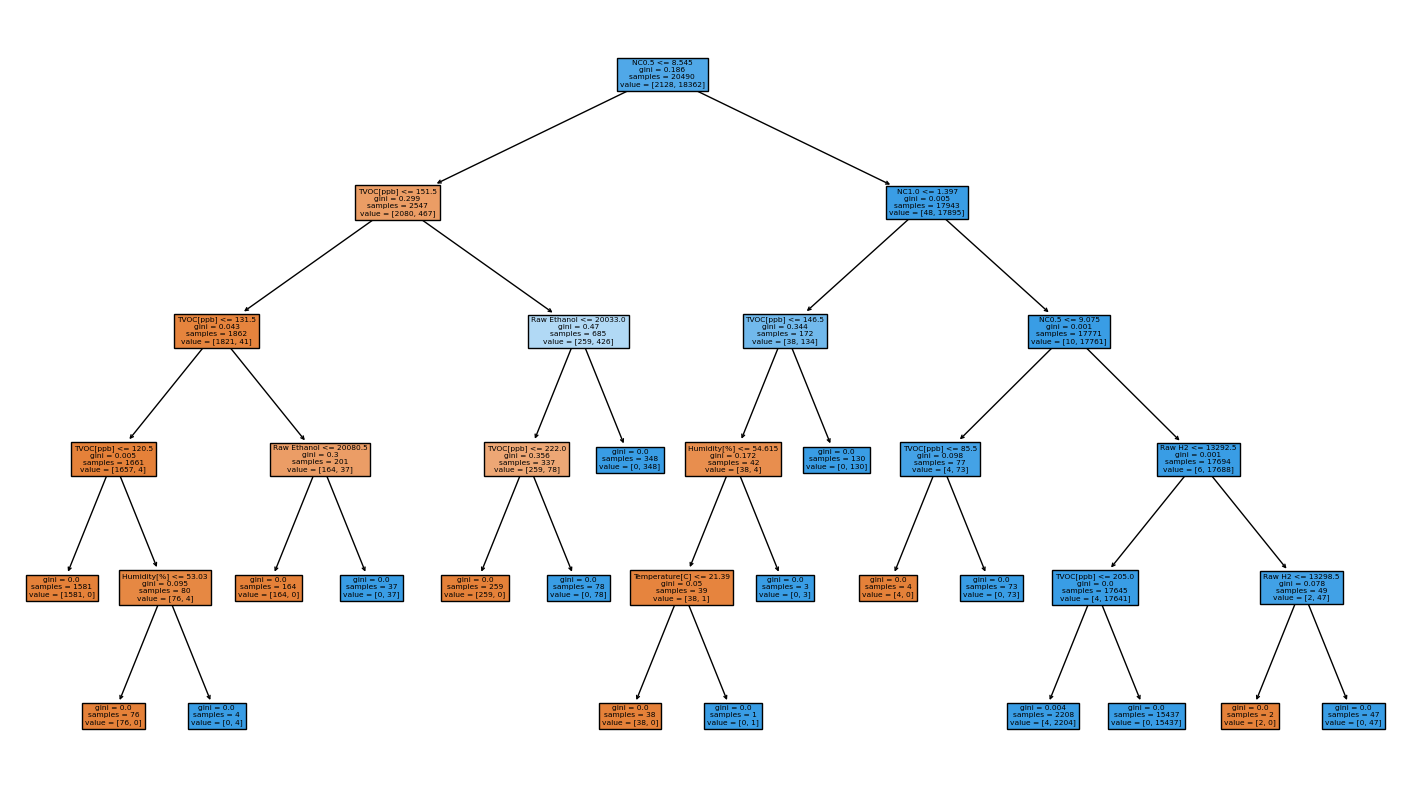

In [38]:
fig = plt.figure(figsize=(18,10))
_ = tree.plot_tree(clf,feature_names=X_train.columns,filled=True)
plt.savefig("decision_tree_new.png", bbox_inches='tight')

In [51]:
from sklearn.metrics import classification_report
y_pred=clf.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       512
           1       1.00      1.00      1.00      4611

    accuracy                           1.00      5123
   macro avg       1.00      1.00      1.00      5123
weighted avg       1.00      1.00      1.00      5123



Podemos ver que la precisión retornada es de 1 tanto para cuando suena la alarma como para cuando no suena. Es decir, el modelo es capaz de predecir con precisión del 100% si la alarma va a sonar o no. Podemos ver también que el f1-score es de 1 para la activacion de la alarma, es decir que no solo tiene buena precisión, sino tambien buena sensibilidad. Para la no activación de alarma tiene un f1-score de 0.99, lo cual es igualmente destacable. 

In [77]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [69]:
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test) 
preds

array([1, 1, 1, ..., 1, 1, 1])

In [84]:
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel()

array([ 512,    0,    0, 4611])

Vemos que no hay falsos positivos ni falsos negativos, todo se predijo correctamente

Conclusión: se fue capaz de entrenar un modelo usando el 80% de la base de datos como entrada de entrenemiento, el otro 20% fue utilizado para testear el modelo. Se utilizo aprendizaje supervisado de clasificación, específicamente de decision tree. El modelo obtenido tuvo una precisión y sensibilidad del 100% para la activación de la alarma.